CHECKPOINT 1:
[]: # Path: Data science\Assignment-1\assign.ipynb

IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

READING THE DATASET

In [3]:
companies=pd.read_csv(r"C:\programming languages\Data science\Assignment-1\companies.txt",sep="\t",encoding='ISO 8859-1')

round2=pd.read_csv(r"C:\programming languages\Data science\Assignment-1\rounds2.csv",encoding='ISO-8859-1')

INSPECTING THE DATA

In [4]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
round2.shape

(114949, 6)

In [6]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254


In [7]:
round2['company_permalink'] = round2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
round2.loc[~round2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [8]:
round2.company_permalink=round2.company_permalink.str.lower()

print(round2.company_permalink.nunique())

66368


INSPECTING THE COMPANIES DATASET

In [9]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
companies.permalink=companies.permalink.str.lower()

In [11]:
companies.shape

(66368, 10)

In [12]:
companies.permalink.nunique() #permalink check

66368

In [13]:
c=companies.permalink.unique()
d=round2.company_permalink.unique()

In [14]:
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.loc[~companies['permalink'].isin(round2['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


MERGING THE DATA SETS

In [15]:
#merging of both data frames on permalink column

master_frame=pd.merge(round2,companies,left_on='company_permalink',right_on='permalink')

In [16]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


CLEANING THE DATASET

In [17]:
#checking percentage of null values in the column wrt to total number of rows
master_frame.isnull().sum()*100/master_frame.shape[0]

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

In [18]:
#dropping the unwanted columns

master_frame.drop(['funding_round_code','funding_round_permalink',
                   'funded_at','permalink','homepage_url','state_code','city',
                   'region','founded_at','status'],axis=1,inplace=True)

In [19]:
#now is the turn of dropping rows on the basis of null columns

master_frame=master_frame[~(master_frame.country_code.isnull() | master_frame.raised_amount_usd.isnull() |
                          master_frame.category_list.isnull())]

In [20]:
master_frame.shape

(88529, 6)

CHECKPOINT 2

In [21]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

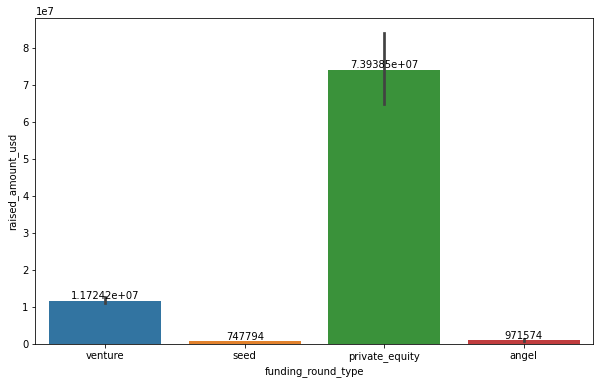

In [22]:
#barplot for funding_round_type(with only fund list) column vs raised_amount_usd column

fund=['angel','seed','venture','private_equity']

plt.figure(figsize=(10,6))
ax=sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame[master_frame.funding_round_type.isin(fund)])

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [23]:
#having only these 4 funding types in master_frame

master_frame=master_frame[master_frame.funding_round_type.isin(fund)]

In [24]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [25]:
#retaining only venture as it supports the company with 5 to 15 million USD per investment

master_frame=master_frame[master_frame.funding_round_type=='venture']

#now that we know our master frame is having only venture type funding rounds so we can drop the funding_round_type column
master_frame.drop(['funding_round_type'],axis=1,inplace=True)

CHECKPOINT 3

In [26]:
master_frame.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

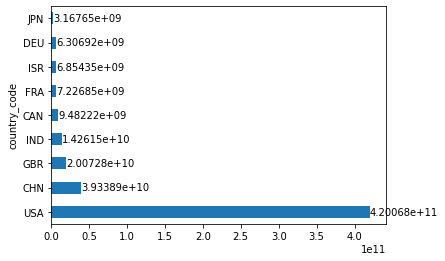

In [27]:
#finding top9 countries with highest number of investments

ax=master_frame.groupby('country_code').raised_amount_usd.sum().nlargest(9).plot(kind='barh')

for i in ax.containers:
    ax.bar_label(i,)

In [28]:
list=['USA','CHN','GBR','IND','RUS','CAN','FRA','ISR','DEU','JPN']

In [29]:
#making a data frame with only top9 countries

top9=master_frame[master_frame.country_code.isin(list)]

In [30]:
top9

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,10000000.0,#fame,Media,IND
4,/organization/0-6-com,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...
114922,/organization/zyomyx-inc,14219999.0,ZYOMYX,Biotechnology,USA
114923,/organization/zyomyx-inc,555016.0,ZYOMYX,Biotechnology,USA
114934,/organization/zyrra,140500.0,Zyrra,E-Commerce,USA
114936,/organization/zystor,8500000.0,Zystor,Biotechnology,USA


In [31]:
#now by applying the knowledge of languages spoken the top english speaking countries are USA,GBR,IND

master_frame=master_frame[master_frame.country_code.isin(['USA','GBR','IND'])]

CHECKPOINT 4

In [32]:
mapping=pd.read_csv(r'C:\programming languages\Data science\Assignment-1\mapping - mapping.csv')

In [33]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [34]:
#To retrieve the primary sector only
master_frame.category_list=master_frame.category_list.apply(lambda x:x.split('|')[0])

In [35]:
mapping.category_list=mapping.category_list.replace({'0':'na'}, regex=True)

In [36]:
mapping.category_list.nunique()

687

In [37]:
#To make the table to achieve only primary sector for each category

mapping=pd.melt(mapping,id_vars=['category_list'],value_vars=['Automotive & Sports','Cleantech / Semiconductors',
                                                              'Entertainment','Health','Manufacturing','News, Search and Messaging',
                                                             'Others','Social, Finance, Analytics, Advertising'])

In [38]:
mapping=mapping[~(mapping.value==0)]

#As job is done so we can drop value column

mapping=mapping.drop(['value'],axis=1)

mapping.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [39]:
mapping=mapping.rename(columns={'variable':'primary_sector'})

In [40]:
master_frame=pd.merge(master_frame,mapping,how='left',on='category_list')

In [41]:
master_frame.head(10)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,10000000.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,20000000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1700000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8900000.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5000000.0,1 Mainstream,Apps,USA,"News, Search and Messaging"
5,/organization/10-minutes-with,4000000.0,10 Minutes With,Education,GBR,Others
6,/organization/1000memories,2520000.0,1000memories,Curated Web,USA,"News, Search and Messaging"
7,/organization/1000museums-com,265940.0,1000museums.com,Curated Web,USA,"News, Search and Messaging"
8,/organization/1000museums-com,2906832.0,1000museums.com,Curated Web,USA,"News, Search and Messaging"
9,/organization/1000museums-com,1500000.0,1000museums.com,Curated Web,USA,"News, Search and Messaging"


In [42]:
master_frame.category_list.nunique()

563

As we have only 563 categories in master_frame and 687 categories in mapping so there might be some categories in master_frame which are not in mapping

In [43]:
master_frame[master_frame.primary_sector.isnull()].category_list.unique()

array(['Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Enterprise 2.0',
       'Adaptive Equipment', 'Racing', 'Specialty Retail',
       'Biotechnology and Semiconductor', 'Rapidly Expanding',
       'Navigation', 'Product Search', 'GreenTech', 'Retirement'],
      dtype=object)

In [44]:
master_frame.primary_sector.isnull().sum()

165

In [45]:
master_frame=master_frame[~(master_frame.primary_sector.isnull())]

In [46]:
master_frame.shape

(38638, 6)

CHECKPOINT 5

In [47]:
master_frame=master_frame.rename(columns={'primary_sector':'main_sector'})

In [48]:
master_frame.raised_amount_usd=master_frame.raised_amount_usd/1000000

In [49]:
D1=master_frame[(master_frame.country_code=='USA') & (master_frame.raised_amount_usd>=5) & (master_frame.raised_amount_usd<=15)]

In [50]:
D1

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
3,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging"
17,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Others
20,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing
21,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing
...,...,...,...,...,...,...
38791,/organization/zynga,15.000000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
38794,/organization/zynga,5.026000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
38798,/organization/zyomyx-inc,12.000000,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors
38799,/organization/zyomyx-inc,14.219999,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors


In [51]:
D1_part=D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count','sum']).rename(
    columns={'count':'Total_count','sum':'Total_amount'})

D1=D1.merge(D1_part,how='left',on='main_sector')

D1.head()

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_26768\1676402181.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  D1=D1.merge(D1_part,how='left',on='main_sector')


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
0,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
1,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",1582,13959.567428
2,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Others,2950,26321.007002
3,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,799,7258.553378
4,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,799,7258.553378


In [52]:
D1.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
12,/organization/1stdibs,15.0,1stdibs,E-Commerce,USA,Others,2950,26321.007002
394,/organization/agari-data,15.0,Agari,SaaS,USA,Others,2950,26321.007002
496,/organization/akorri,15.0,Akorri Networks,Software,USA,Others,2950,26321.007002
617,/organization/altoweb,15.0,AltoWeb,Software,USA,Others,2950,26321.007002
772,/organization/appcelerator,15.0,Appcelerator,Enterprise Software,USA,Others,2950,26321.007002
...,...,...,...,...,...,...,...,...
8295,/organization/purecars,5.0,PureCars,Automotive,USA,Automotive & Sports,167,1454.104361
8399,/organization/quick-hit,5.0,Quick Hit,Sports,USA,Automotive & Sports,167,1454.104361
8464,/organization/raidcore,5.0,RAIDCore,Design,USA,Automotive & Sports,167,1454.104361
9239,/organization/sentera,5.0,Sentera,Aerospace,USA,Automotive & Sports,167,1454.104361


In [53]:
D_prac=D1.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)
D_prac2=D_prac[D_prac.groupby('main_sector').cumcount()==1]

C:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [54]:
D_prac2

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
394,/organization/agari-data,15.0,Agari,SaaS,USA,Others,2950,26321.007002
294,/organization/admob,15.0,AdMob,Advertising,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
114,/organization/acadia-pharmaceuticals,15.0,ACADIA Pharmaceuticals,Biotechnology,USA,Cleantech / Semiconductors,2300,21206.628192
233,/organization/adallom,15.0,Adallom,Cloud Computing,USA,"News, Search and Messaging",1582,13959.567428
409,/organization/agility-communications,15.0,Agility Communications,Lasers,USA,Health,909,8211.859357
139,/organization/accompany,15.0,Accompany,3D,USA,Manufacturing,799,7258.553378
3272,/organization/dreamworks-animation,15.0,DreamWorks Animation,Entertainment,USA,Entertainment,591,5099.197982
3766,/organization/exostar,15.0,Exostar,Aerospace,USA,Automotive & Sports,167,1454.104361


In [55]:
D2=master_frame[(master_frame.country_code=='GBR') & (master_frame.raised_amount_usd>=5) & (master_frame.raised_amount_usd<=15)]

D2_part=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count','sum']).rename(
    columns={'count':'Total_count','sum':'Total_amount'})

D2=D2.merge(D2_part,how='left',on='main_sector')

D2.head()

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_26768\3010976895.py:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  D2=D2.merge(D2_part,how='left',on='main_sector')


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
0,/organization/365scores,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
1,/organization/7digital,8.468328,7digital,Content Creators,GBR,Entertainment,56,482.784687
2,/organization/7digital,10.000000,7digital,Content Creators,GBR,Entertainment,56,482.784687
3,/organization/90min,15.000000,90min,Media,GBR,Entertainment,56,482.784687
4,/organization/90min,5.800000,90min,Media,GBR,Entertainment,56,482.784687


In [56]:
D2.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
64,/organization/azure-solutions,15.000000,Azure Solutions,Software,GBR,Others,147,1283.624289
169,/organization/environmentiq,15.000000,EnvironmentIQ,Software,GBR,Others,147,1283.624289
247,/organization/ip-access,15.000000,ip.access,Software,GBR,Others,147,1283.624289
358,/organization/notonthehighstreet,15.000000,Notonthehighstreet,E-Commerce,GBR,Others,147,1283.624289
467,/organization/sensage,15.000000,SenSage,Security,GBR,Others,147,1283.624289
...,...,...,...,...,...,...,...,...
600,/organization/yasa-motors,7.576257,YASA Motors,Automotive,GBR,Automotive & Sports,16,167.051565
102,/organization/carwow,7.230241,Carwow,Automotive,GBR,Automotive & Sports,16,167.051565
57,/organization/autoquake,6.000000,Autoquake,Automotive,GBR,Automotive & Sports,16,167.051565
58,/organization/autoquake,5.755376,Autoquake,Automotive,GBR,Automotive & Sports,16,167.051565


In [57]:
D_prac3=D2.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)
D_prac4=D_prac3[D_prac3.groupby('main_sector').cumcount()==1]
D_prac4

C:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
169,/organization/environmentiq,15.000000,EnvironmentIQ,Software,GBR,Others,147,1283.624289
162,/organization/elixent,15.000000,Elixent,Semiconductors,GBR,Cleantech / Semiconductors,128,1150.139665
384,/organization/opengamma,15.000000,OpenGamma,Financial Services,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
327,/organization/muzicall,13.381200,Muzicall,Mobile,GBR,"News, Search and Messaging",73,615.746235
324,/organization/mubi,15.000000,MUBI,Entertainment,GBR,Entertainment,56,482.784687
330,/organization/mydeco,14.529275,mydeco,3D,GBR,Manufacturing,42,361.940335
395,/organization/oxonica,14.034694,Oxonica,Health Diagnostics,GBR,Health,24,214.537510
274,/organization/light-blue-optics,15.000000,Light Blue Optics,Automotive,GBR,Automotive & Sports,16,167.051565


In [58]:
D3=master_frame[(master_frame.country_code=='IND') & (master_frame.raised_amount_usd>=5) & (master_frame.raised_amount_usd<=15)]

D3_part=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['count','sum']).rename(
    columns={'count':'Total_count','sum':'Total_amount'})

D3=D3.merge(D3_part,how='left',on='main_sector')

D3.head()

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_26768\2792972401.py:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  D3=D3.merge(D3_part,how='left',on='main_sector')


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
0,/organization/-fame,10.000000,#fame,Media,IND,Entertainment,33,280.830000
1,/organization/21diamonds-india,6.369507,21Diamonds,E-Commerce,IND,Others,110,1013.409507
2,/organization/a-little-world,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",60,550.549550
3,/organization/adlabs-imagica,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,33,280.830000
4,/organization/agile,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",60,550.549550


In [59]:
D3.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
41,/organization/caratlane,15.0,CaratLane,E-Commerce,IND,Others,110,1013.409507
52,/organization/classteacher-learning-systems,15.0,Classteacher Learning Systems,EdTech,IND,Others,110,1013.409507
58,/organization/comat-technologies,15.0,Comat Technologies,Governments,IND,Others,110,1013.409507
59,/organization/commonfloor,15.0,CommonFloor,Real Estate,IND,Others,110,1013.409507
97,/organization/firstcry-com,15.0,FirstCry.com,E-Commerce,IND,Others,110,1013.409507
...,...,...,...,...,...,...,...,...
324,/organization/zoomcar-india,8.0,ZoomCar,Automotive,IND,Automotive & Sports,13,136.900000
191,/organization/mistral-solutions,6.5,Mistral Solutions,Aerospace,IND,Automotive & Sports,13,136.900000
290,/organization/tonbo-imaging,6.4,Tonbo Imaging,Design,IND,Automotive & Sports,13,136.900000
8,/organization/ani-technologies,5.0,Ola,Automotive,IND,Automotive & Sports,13,136.900000


In [60]:
D_prac5=D3.sort_values([('raised_amount_usd', 'Total_amount'),'main_sector','raised_amount_usd'],ascending=False)
D_prac6=D_prac5[D_prac5.groupby('main_sector').cumcount()==1]
D_prac6

C:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_count)","(raised_amount_usd, Total_amount)"
52,/organization/classteacher-learning-systems,15.0,Classteacher Learning Systems,EdTech,IND,Others,110,1013.409507
95,/organization/financial-information-network-op...,15.0,Financial Information Network & Operations Pvt,Finance,IND,"Social, Finance, Analytics, Advertising",60,550.549550
122,/organization/hike,14.0,hike,Messaging,IND,"News, Search and Messaging",52,433.834545
196,/organization/moonfrog-labs,15.0,Moonfrog Labs,Game,IND,Entertainment,33,280.830000
319,/organization/yuhi-hospitality,15.0,YUHI Hospitality,Food Processing,IND,Manufacturing,21,200.900000
151,/organization/ivy-health-and-life-sciences,12.1,Ivy Health and Life Sciences,Health and Wellness,IND,Health,19,167.740000
233,/organization/perfint-healthcare,14.0,Perfint Healthcare,Biotechnology,IND,Cleantech / Semiconductors,20,165.380000
136,/organization/incredible-technologies-pvt-ltd,15.0,Incredible Technologies (CredR),Automotive,IND,Automotive & Sports,13,136.900000


In [61]:
D1.raised_amount_usd.count()

12012

In [62]:
D2.raised_amount_usd.count()

619

In [63]:
D3.raised_amount_usd.count()

328

In [64]:
#total investement in USD for USA, GBR and IND
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

107318.29466400002
5365.2283
2949.5436019999997


In [65]:
D1_part

raised_amount_usd              
                                              Total_count  Total_amount
main_sector                                                            
Automotive & Sports                                   167   1454.104361
Cleantech / Semiconductors                           2300  21206.628192
Entertainment                                         591   5099.197982
Health                                                909   8211.859357
Manufacturing                                         799   7258.553378
News, Search and Messaging                           1582  13959.567428
Others                                               2950  26321.007002
Social, Finance, Analytics, Advertising              2714  23807.376964

In [66]:
D2_part

raised_amount_usd             
                                              Total_count Total_amount
main_sector                                                           
Automotive & Sports                                    16   167.051565
Cleantech / Semiconductors                            128  1150.139665
Entertainment                                          56   482.784687
Health                                                 24   214.537510
Manufacturing                                          42   361.940335
News, Search and Messaging                             73   615.746235
Others                                                147  1283.624289
Social, Finance, Analytics, Advertising               133  1089.404014

In [67]:
D3_part

raised_amount_usd             
                                              Total_count Total_amount
main_sector                                                           
Automotive & Sports                                    13   136.900000
Cleantech / Semiconductors                             20   165.380000
Entertainment                                          33   280.830000
Health                                                 19   167.740000
Manufacturing                                          21   200.900000
News, Search and Messaging                             52   433.834545
Others                                                110  1013.409507
Social, Finance, Analytics, Advertising                60   550.549550

In [68]:
D1.raised_amount_usd

0         8.900000
1         5.000000
2        11.999347
3        15.000000
4         5.000000
           ...    
12007    15.000000
12008     5.026000
12009    12.000000
12010    14.219999
12011     8.500000
Name: raised_amount_usd, Length: 12012, dtype: float64

In [69]:
D1_part.raised_amount_usd.Total_count

main_sector
Automotive & Sports                         167
Cleantech / Semiconductors                 2300
Entertainment                               591
Health                                      909
Manufacturing                               799
News, Search and Messaging                 1582
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Name: Total_count, dtype: int64

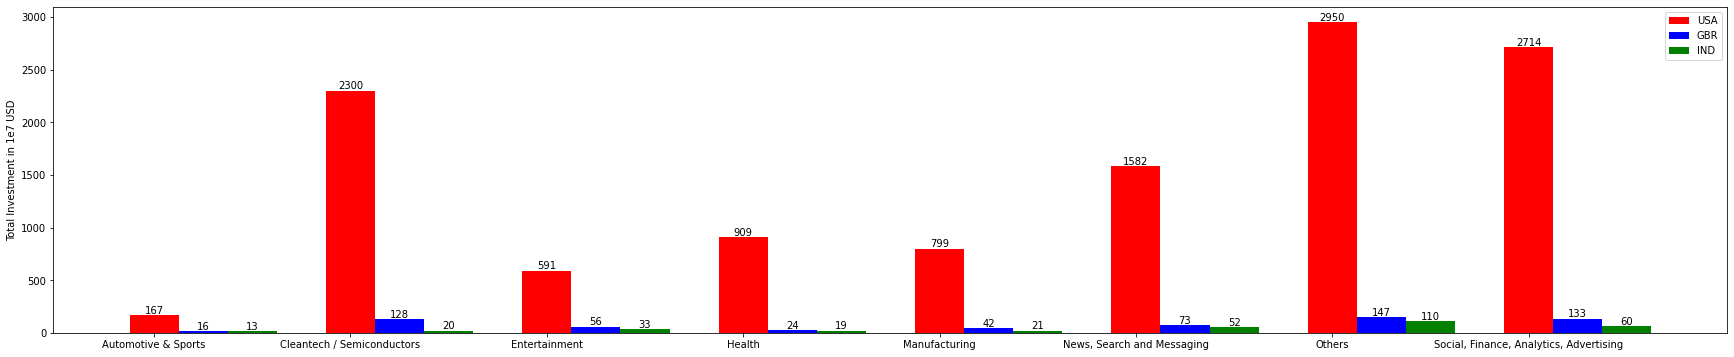

In [70]:
l1=['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health',
    'Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']

plt.figure(figsize=(30,6))
X_axis=np.arange(8)
aux=plt.bar(X_axis ,D1_part.raised_amount_usd.Total_count,0.25,color='red')
aux1=plt.bar(X_axis +0.25,D2_part.raised_amount_usd.Total_count,0.25,color='blue')
aux2=plt.bar(X_axis +0.25*2,D3_part.raised_amount_usd.Total_count,0.25,color='green')

for i in aux,aux1,aux2:
    plt.bar_label(i,)

plt.xticks(X_axis,l1)
plt.legend(['USA','GBR','IND'])
plt.ylabel('Total Investment in 1e7 USD')
plt.show()



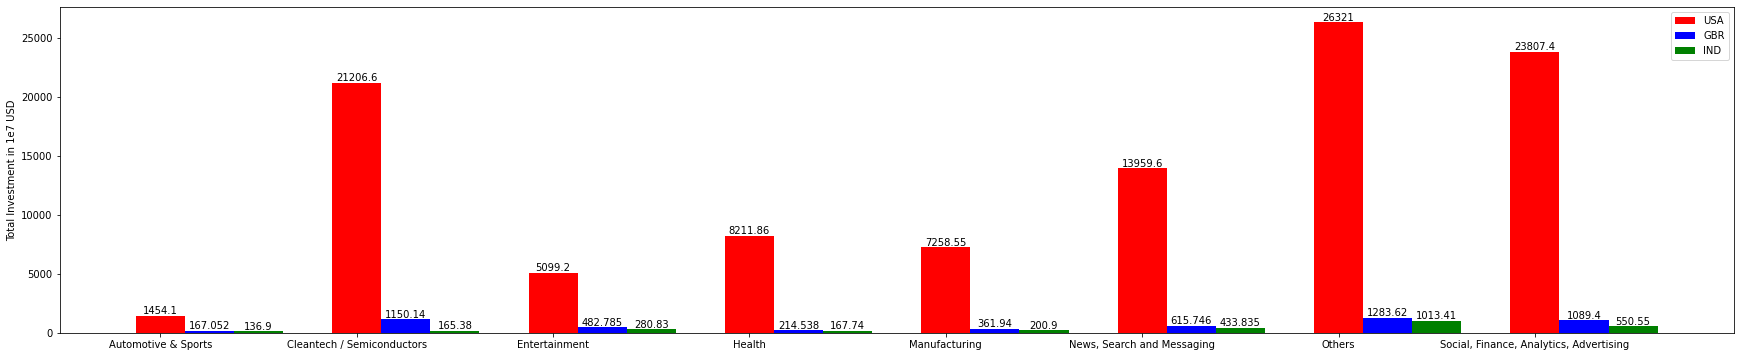

In [71]:
l1=['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health',
    'Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']

plt.figure(figsize=(30,6))
X_axis=np.arange(8)
aux=plt.bar(X_axis ,D1_part.raised_amount_usd.Total_amount,0.25,color='red')
aux1=plt.bar(X_axis +0.25,D2_part.raised_amount_usd.Total_amount,0.25,color='blue')
aux2=plt.bar(X_axis +0.25*2,D3_part.raised_amount_usd.Total_amount,0.25,color='green')

for i in aux,aux1,aux2:
    plt.bar_label(i,)

plt.xticks(X_axis,l1)
plt.legend(['USA','GBR','IND'])
plt.ylabel('Total Investment in 1e7 USD')
plt.show()